## Ансамбли и полносвязные нейронные сети
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.76$ - 0 баллов
- $0.76 < AUC \leq 0.77$ - 2 балла
- $0.77 < AUC \leq 0.78$ - 4 балла
- $0.78 < AUC \leq 0.79$ - 6 баллов
- $0.79 < AUC \leq 0.80$ - 8 баллов
- $AUC > 0.80$ - 10 баллов


In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('german.csv', sep=';')
print(data.head())

X = data.iloc[:, 1:].to_numpy()
y = data.iloc[:, 0].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   Creditability  Account_Balance  Duration_of_Credit_monthly  \
0              1                1                          18   
1              1                1                           9   
2              1                2                          12   
3              1                1                          12   
4              1                1                          12   

   Payment_Status_of_Previous_Credit  Purpose  Credit_Amount  \
0                                  4        2           1049   
1                                  4        0           2799   
2                                  2        9            841   
3                                  4        0           2122   
4                                  4        0           2171   

   Value_Savings_Stocks  Length_of_current_employment  Instalment_per_cent  \
0                     1                             2                    4   
1                     1                             3               

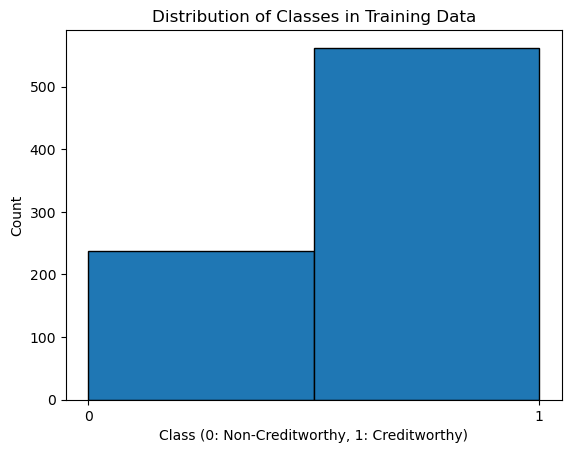

In [4]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [5]:
# Обучение Random Forest
rf_model = RandomForestClassifier(
    n_estimators=11,
    criterion='entropy', 
    max_depth=4,
    bootstrap=True,
    class_weight='balanced_subsample',
    random_state=42
)

rf_model.fit(X_train, y_train)

# Прогноз на тестовых данных
rf_pred = rf_model.predict(X_test)

# Расчет метрик для Random Forest
rf_roc_auc = roc_auc_score(y_test, rf_pred)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)

print("Random Forest метрики:")
print(f"ROC AUC: {rf_roc_auc:.2f}")
print(f"Accuracy: {rf_accuracy:.2f}")
print(f"Precision: {rf_precision:.2f}")
print(f"Recall: {rf_recall:.2f}")

# (criterion='squared_error', n_estimators=190, random_state=41, min_samples_leaf=37, max_depth=2, learning_rate=0.2, max_features=19)

# Обучение Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.2,
    max_depth=2,
    min_samples_split=2,
    min_samples_leaf=37,
    max_features=20,
    criterion='squared_error',
    random_state=42
)
gb_model.fit(X_train, y_train)

# Прогноз на тестовых данных
gb_pred = gb_model.predict(X_test)

# Расчет метрик для Gradient Boosting
gb_roc_auc = roc_auc_score(y_test, gb_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)
gb_precision = precision_score(y_test, gb_pred)
gb_recall = recall_score(y_test, gb_pred)

print("\nGradient Boosting метрики:")
print(f"ROC AUC: {gb_roc_auc:.2f}")
print(f"Accuracy: {gb_accuracy:.2f}")
print(f"Precision: {gb_precision:.2f}")
print(f"Recall: {gb_recall:.2f}")

Random Forest метрики:
ROC AUC: 0.79
Accuracy: 0.79
Precision: 0.89
Recall: 0.79

Gradient Boosting метрики:
ROC AUC: 0.71
Accuracy: 0.77
Precision: 0.82
Recall: 0.86


In [6]:
ensemble_model = VotingClassifier(
    estimators=[
        ('random_forest', rf_model),
        ('gradient_boosting', gb_model)
    ],
    voting='soft'  
)

ensemble_model.fit(X_train, y_train)

ensemble_pred = ensemble_model.predict(X_test)

ensemble_roc_auc = roc_auc_score(y_test, ensemble_model.predict_proba(X_test)[:, 1])
ensemble_accuracy = accuracy_score(y_test, ensemble_pred)
ensemble_precision = precision_score(y_test, ensemble_pred)
ensemble_recall = recall_score(y_test, ensemble_pred)

print("Ансамблевая модель метрики:")
print(f"ROC AUC: {ensemble_roc_auc:.2f}")
print(f"Accuracy: {ensemble_accuracy:.2f}")
print(f"Precision: {ensemble_precision:.2f}")
print(f"Recall: {ensemble_recall:.2f}")

Ансамблевая модель метрики:
ROC AUC: 0.81
Accuracy: 0.80
Precision: 0.84
Recall: 0.88


In [7]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=400, random_state=42,alpha=0.001)
mlp_model.fit(X_train, y_train)

mlp_pred = mlp_model.predict(X_test)
mlp_pred_pr = mlp_model.predict_proba(X_test)[:,1]

mlp_roc_auc = roc_auc_score(y_test, mlp_pred_pr)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_precision = precision_score(y_test, mlp_pred)
mlp_recall = recall_score(y_test, mlp_pred)

print("\nMLP (Neural Network) метрики:")
print(f"ROC AUC: {mlp_roc_auc:.2f}")
print(f"Accuracy: {mlp_accuracy:.2f}")
print(f"Precision: {mlp_precision:.2f}")
print(f"Recall: {mlp_recall:.2f}")


MLP (Neural Network) метрики:
ROC AUC: 0.78
Accuracy: 0.77
Precision: 0.82
Recall: 0.84


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели